In [11]:
# Packages to run the code

import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import fsolve

from scipy.stats import binom

from scipy.integrate import quad

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

<IPython.core.display.Javascript object>


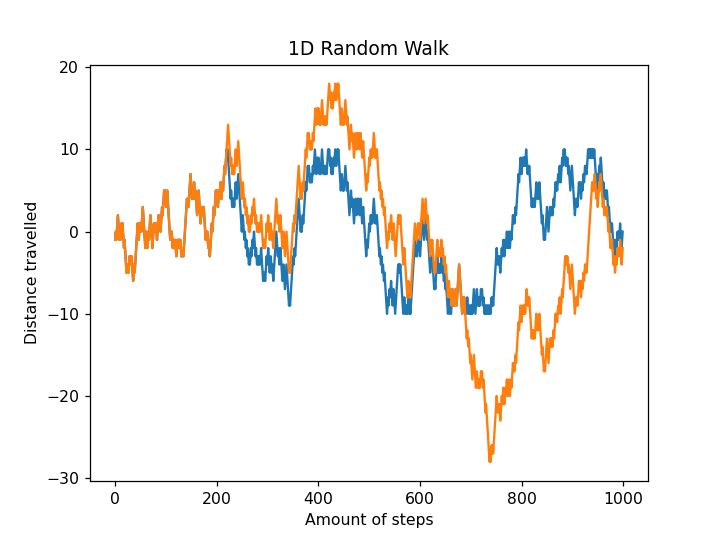

In [12]:
# Generate random walk

## Define parameters for the walk
dims = 1
step_n = 1000

step_size = 1

step_set = [-step_size, step_size]
origin = np.zeros((1,dims))

## Plot the path

P = []

fig,ax = plt.subplots(1,1)

tries = 1

x = []
y = []

h = 0
l = 0

D = 10


for j in range(0,step_n):
    
    ## Simulate steps in 3D
    steps = np.random.choice(a=step_set)
    #path = np.concatenate([origin, steps]).cumsum(0)
    
    if (h + steps <= D) and (h + steps >= -D):
        h += steps
    else:
        h = h-steps
    l += steps
    
    x.append(h)
    
    y.append(l)

ax.plot(x)
ax.plot(y)

plt.title('1D Random Walk')

plt.xlabel('Amount of steps')
plt.ylabel('Distance travelled')

plt.show()

<IPython.core.display.Javascript object>


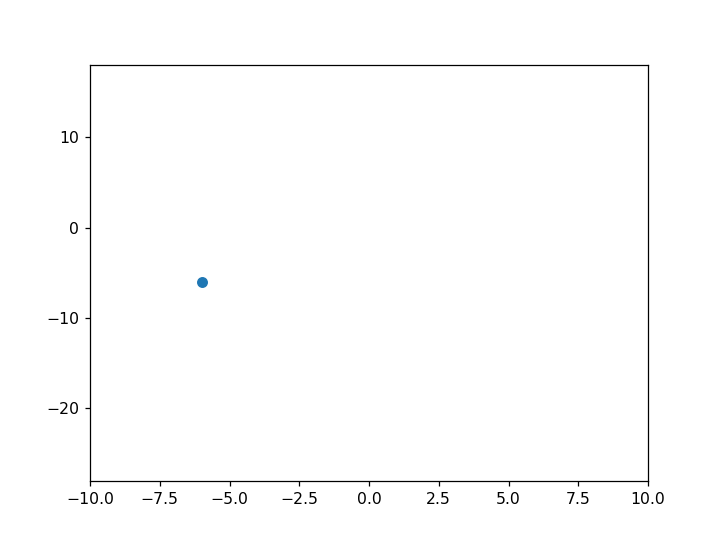

In [13]:
import matplotlib.animation as animation
from time import sleep



fig, ax = plt.subplots(1,1)

dot, = ax.plot([], [], 'o')


def animate(i):
    dot.set_data(x[i], y[i])
    sleep(0.1)
        
anim = animation.FuncAnimation(fig, animate, frames=step_n, interval=1)
plt.xlim(-D,D)
plt.ylim(min(y),max(y))

plt.show()

In [4]:
# Initialization

v0 = 1 # start velocity second order integrator
x0 = 1
m = 1
gamma = 1

t_end = 50
dt = 0.1
steps = t_end/dt
steps = int(steps)
t = np.linspace(0,t_end,steps)

kT = 0.25

v = [v0]

x = [x0]

x_av = np.array([0]*steps)

v_av = np.array([0]*steps)

v2_av = np.array([0]*steps)

x2_av = np.array([0]*steps)

sigma = np.sqrt(2*kT*gamma)

N = 1000

## Run Langevin dynamics

for j in range(0,N):
    
    for i in range(1, steps):

        xi = np.random.randn()

        theta = np.random.randn()

        C = dt**2/2*-gamma/m*v[i-1] + sigma*dt**(3/2)*(1/2*xi+1/(2*np.sqrt(3))*theta)

        x = np.append(x, x[i-1] + v[i-1]*dt+C)
        v.append(v[i-1]-dt*gamma/m*v[i-1]+sigma*np.sqrt(dt)*xi-gamma*C)
    
    x_av = x_av + np.array(x)
    v_av = v_av + np.array(v)
    v2_av = v2_av + np.array(v)**2
    x2_av = x2_av + (np.array(x)-x0)**2
    
    x = [x0]
    v = [v0]
    
x_av = x_av/N
v_av = v_av/N
v2_av = v2_av/N
x2_av = x2_av/N

<IPython.core.display.Javascript object>


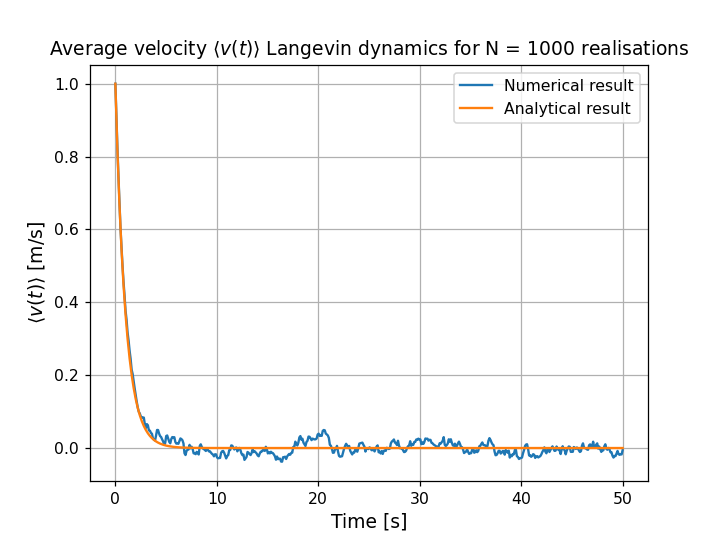

In [5]:
fig, ax = plt.subplots(1,1)

plt.plot(t,v_av, label = 'Numerical result')
plt.plot(t,v0*np.exp(-gamma*t/m), label = 'Analytical result')


plt.title(r'Average velocity $ \langle v(t) \rangle $ Langevin dynamics for N = ' + str(N) + ' realisations')
plt.xlabel('Time [s]', fontsize = 12)
plt.ylabel(r'$ \langle v(t) \rangle $ [m/s]', fontsize = 12)

plt.grid()
plt.legend(loc = 'upper right')


plt.show()

<IPython.core.display.Javascript object>


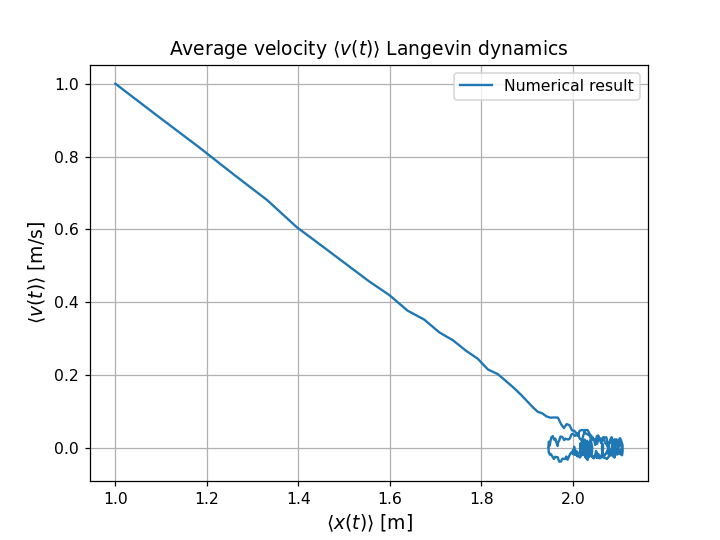

In [6]:
fig, ax = plt.subplots(1,1)

plt.plot(x_av,v_av, label = 'Numerical result')

plt.title(r'Average velocity $ \langle v(t) \rangle $ Langevin dynamics')
plt.xlabel(r'$ \langle x(t) \rangle $ [m]', fontsize = 12)
plt.ylabel(r'$ \langle v(t) \rangle $ [m/s]', fontsize = 12)

plt.grid()
plt.legend(loc = 'upper right')


plt.show()

<IPython.core.display.Javascript object>


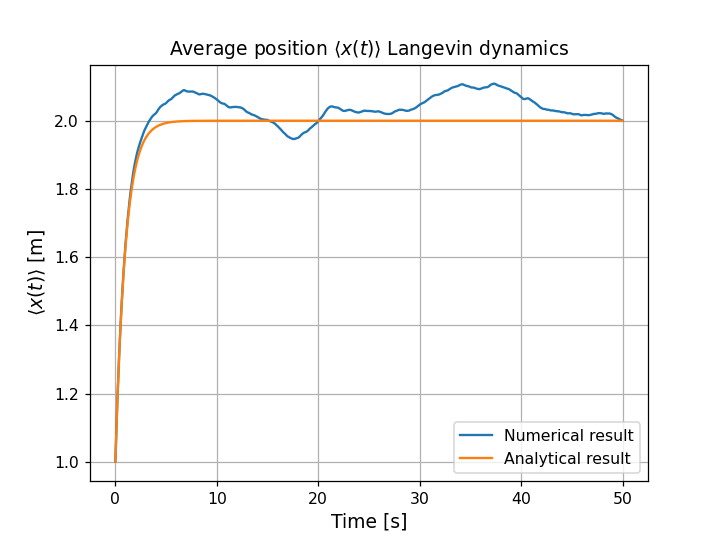

In [7]:
fig, ax = plt.subplots(1,1)

plt.plot(t,x_av, label = 'Numerical result')
plt.plot(t,x0+v0/gamma*(1-np.exp(-gamma*t)), label = 'Analytical result')

plt.title(r'Average position $ \langle x(t) \rangle $ Langevin dynamics')
plt.xlabel('Time [s]', fontsize = 12)
plt.ylabel(r'$ \langle x(t) \rangle $ [m]', fontsize = 12)

plt.grid()
plt.legend(loc = 'lower right')


plt.show()

<IPython.core.display.Javascript object>


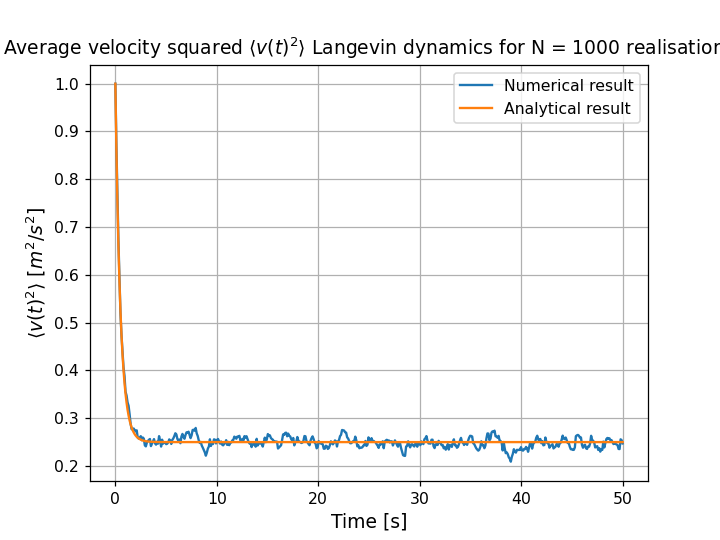

In [8]:
fig, ax = plt.subplots(1,1)

plt.plot(t,v2_av, label = 'Numerical result')
plt.plot(t,(v0**2-kT/m)*np.exp(-2*gamma*t/m)+ kT/m, label = 'Analytical result')

plt.title(r'Average velocity squared $ \langle v(t)^{2} \rangle $ Langevin dynamics for N = ' + str(N) + ' realisations')
plt.xlabel('Time [s]', fontsize = 12)
plt.ylabel(r'$ \langle v(t)^{2} \rangle $ $[m^2/s^2]$', fontsize = 12)

plt.grid()
plt.legend(loc = 'upper right')


plt.show()

<IPython.core.display.Javascript object>


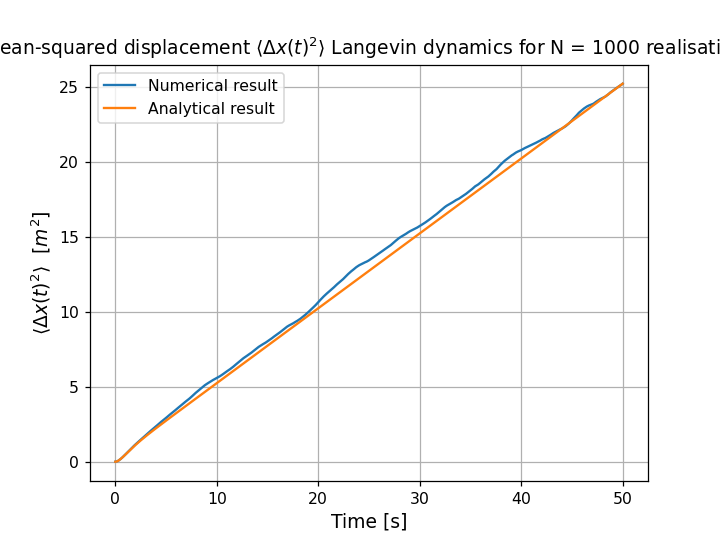

In [9]:
fig, ax = plt.subplots(1,1)

plt.plot(t,x2_av, label = 'Numerical result')
plt.plot(t,(v0**2-kT/m)*m**2/gamma**2*(np.exp(-gamma*t/m)-1)**2+ 2*kT/gamma*(t-m/gamma*(1-np.exp(-gamma/m*t))), label = 'Analytical result')
#plt.plot(t, v0**2*t**2, linestyle = '--', label = 'Ballistic limit')
#plt.plot(t, 2*kT/gamma*t+m**2*v0**2/gamma**2-3*kT*m/gamma**2, linestyle = '--', label = 'Diffusive limit', color = 'cyan')

plt.title(r'Mean-squared displacement $ \langle \Delta x(t)^{2} \rangle $ Langevin dynamics for N = ' + str(N) + ' realisations')
plt.xlabel('Time [s]', fontsize = 12)
plt.ylabel(r'$ \langle \Delta x(t)^{2} \rangle$  $[m^{2}]$', fontsize = 12)

#plt.ylim(0,4)
#plt.xlim(0,6)

plt.grid()
plt.legend(loc = 'upper left')


plt.show()